In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data = pd.read_excel('iris.xls')

In [3]:
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

*As there are some null values present, filling those cells *


In [7]:
for i in ['SL','SW','PL']:
  iris_data[i] = iris_data[i].fillna(method='ffill')

In [8]:
iris_data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

*Boxplot to detect outliers*


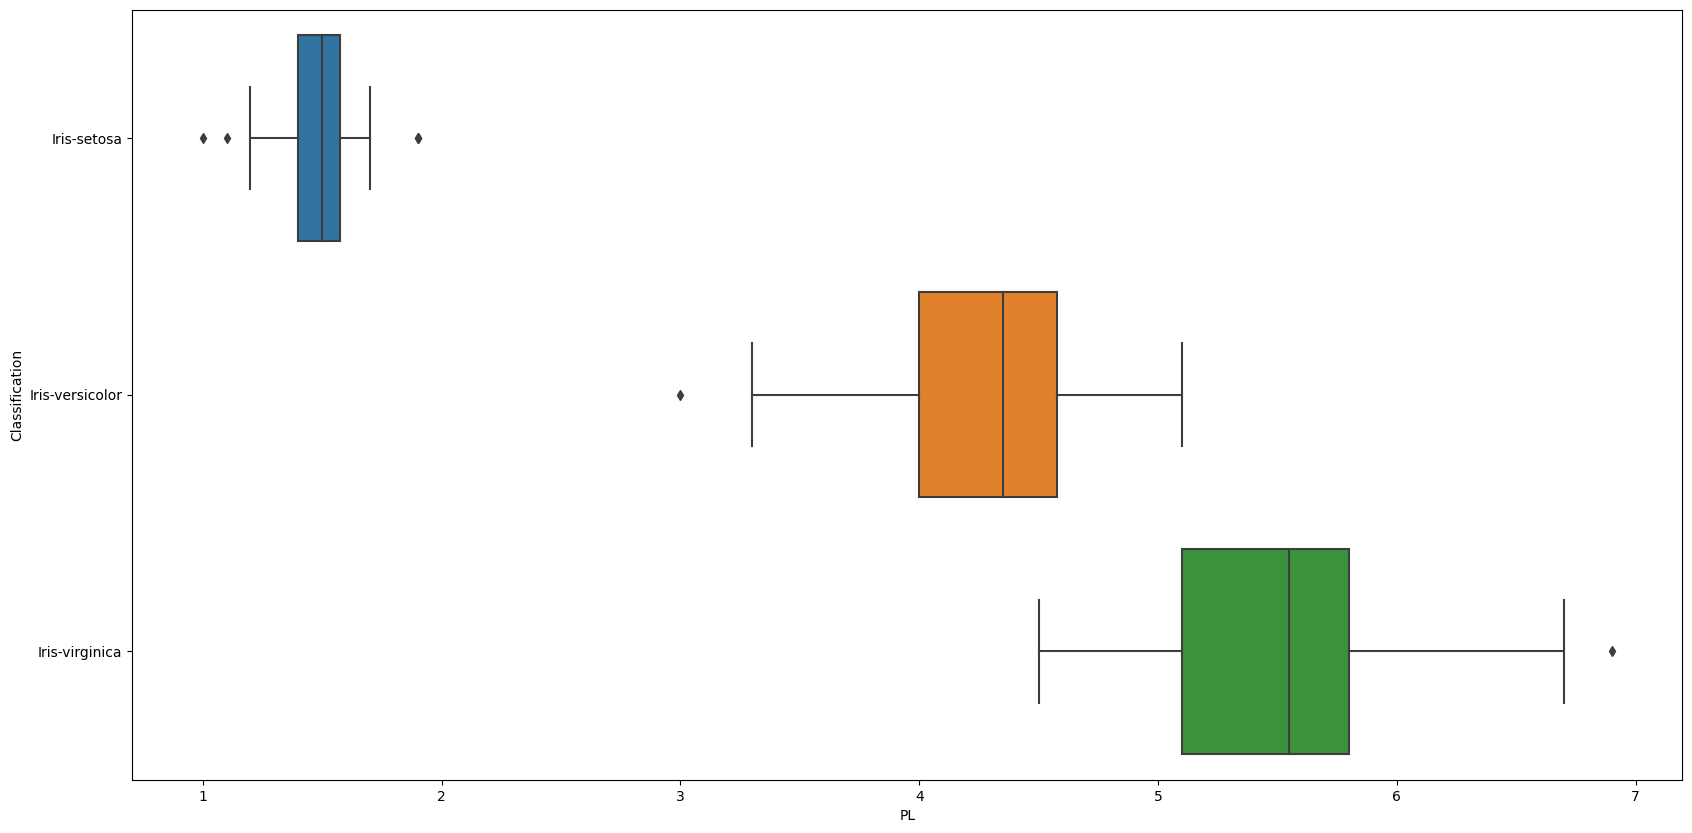

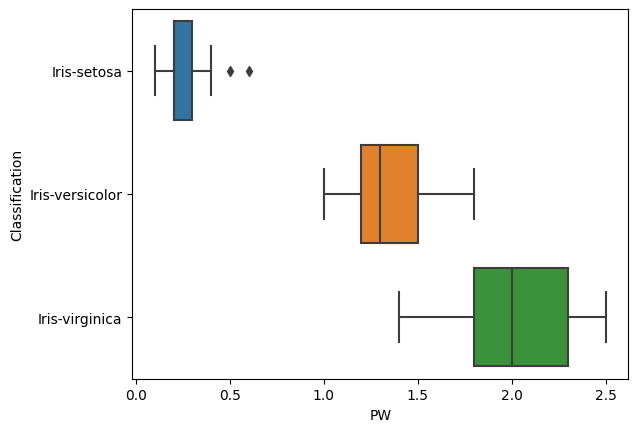

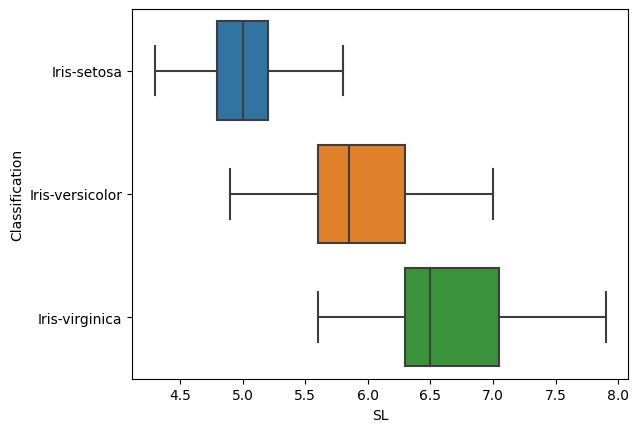

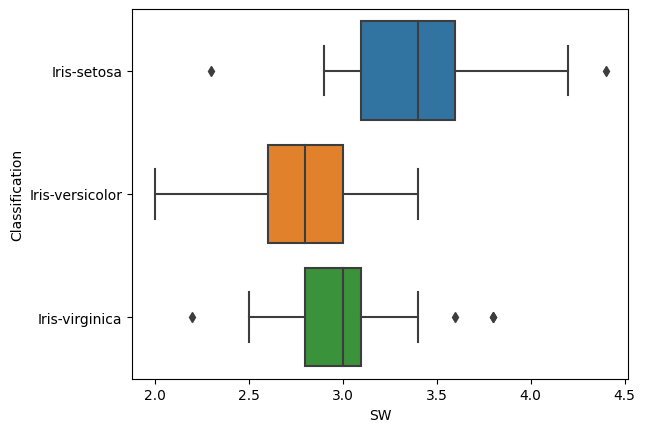

In [9]:
plt.figure(figsize=(20,10))
for i in ['PL','PW','SL','SW']:
  sns.boxplot(data = iris_data,x = iris_data[i],y = iris_data['Classification'])
  plt.show()


*As few outliers are detected, such rows are removed*


In [10]:
for i in ['PL','PW','SW']:
  q1 = np.percentile(iris_data[i],25,method = 'midpoint')
  q2 = np.percentile(iris_data[i],50,method = 'midpoint')
  q3 = np.percentile(iris_data[i],75,method = 'midpoint')

  iqr = q3-q1

  low_lim = q1-1.5*iqr
  up_lim = q3+1.5*iqr

  outliers = []
  for x in iris_data[i]:
    if((x>up_lim)or(x<low_lim)):
       outliers.append(x)
outliers

[4.4, 4.1, 4.2, 2.0]

In [11]:
ind = iris_data["SW"]>up_lim
ind = iris_data.loc[ind].index
iris_data.drop(ind, inplace= True)

In [12]:
iris_data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.9,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.0,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**Encoding**

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_data['Classification'] = le.fit_transform(iris_data['Classification'])
iris_data['Classification'].unique()

array([0, 1, 2])

**CLASSIFICATION**


**1. Logistic Regression**

In [50]:
x = iris_data.drop(['Classification'],axis = 1)
y = iris_data['Classification']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2, random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_model  = lr.fit(x_train,y_train)
lr_predictions = lr_model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,lr_predictions)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

**KNN**

In [54]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,20)
for k in neighbors:
  classifier = KNeighborsClassifier(n_neighbors = k,metric = 'euclidean')
  classifier.fit(x_train,y_train)
  k_predictions = classifier.predict(x_test)
  acs = accuracy_score(y_test,k_predictions)
  metric_k.append(acs)
metric_k

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 0.9666666666666667]

In [55]:
confusion_matrix(y_test,k_predictions)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

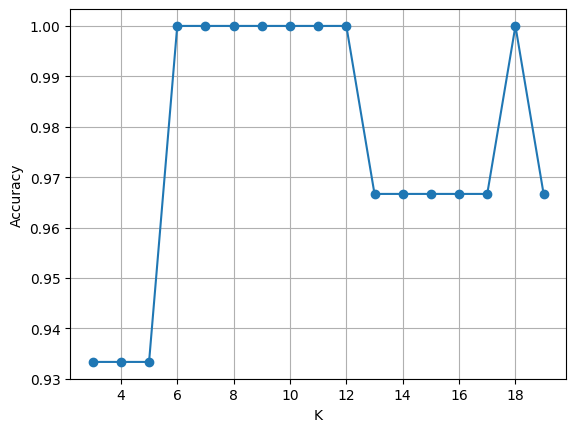

In [56]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid()

**SVM**

In [57]:
from sklearn.svm import SVC
svm_class = SVC(kernel = 'linear')
svm_model = svm_class.fit(x_train,y_train)
svm_pred = svm_model.predict(x_test)

In [58]:
confusion_matrix(y_test,svm_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

In [59]:
svm_cls = SVC(kernel = 'rbf')
rbf_model = svm_cls.fit(x_train,y_train)
rbf_pred = rbf_model.predict(x_test)
confusion_matrix(y_test,rbf_pred)


array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]])

**DECISION TREE**

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt_class = DecisionTreeClassifier()
dt_model = dt_class.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)

In [61]:
confusion_matrix(y_test,dt_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

**RANDOM FOREST**

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier()
rf_model = rf_class.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)
confusion_matrix(y_test,rf_pred)

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  0,  9]])

In [63]:
print('Logistic regression Accuracy : ',accuracy_score(y_test,lr_predictions))
print('SVM linear Accuracy : ',accuracy_score(y_test,svm_pred))
print('SVM rbf Accuracy : ',accuracy_score(y_test,rbf_pred))
print('KNN Accuracy : ',accuracy_score(y_test,k_predictions))
print('DT Accuracy : ', accuracy_score(y_test,dt_pred))
print('RF Accuracy : ', accuracy_score(y_test,rf_pred))


Logistic regression Accuracy :  0.9666666666666667
SVM linear Accuracy :  0.9666666666666667
SVM rbf Accuracy :  1.0
KNN Accuracy :  0.9666666666666667
DT Accuracy :  0.9666666666666667
RF Accuracy :  0.9666666666666667


In [64]:
print('ALL THE MODELS PERFORM QUITE WELL')

ALL THE MODELS PERFORM QUITE WELL
